In [3]:
## Importations
import pandas as pd
import numpy as np

In [4]:
#To read the data
data = pd.read_csv("FoodBalance.csv", encoding='latin-1')

In [5]:
data.head(5)

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,4,Algeria,2501,Population,511,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00
1,4,Algeria,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
2,4,Algeria,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00
3,4,Algeria,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,94.90,94.35,94.72,92.82,91.83
4,4,Algeria,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,80.06,79.36,77.40,80.19,77.28


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60943 entries, 0 to 60942
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     60943 non-null  int64  
 1   Area          60943 non-null  object 
 2   Item Code     60943 non-null  int64  
 3   Item          60943 non-null  object 
 4   Element Code  60943 non-null  int64  
 5   Element       60943 non-null  object 
 6   Unit          60943 non-null  object 
 7   Y2014         59354 non-null  float64
 8   Y2015         59395 non-null  float64
 9   Y2016         59408 non-null  float64
 10  Y2017         59437 non-null  float64
 11  Y2018         59507 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 5.6+ MB


There are 60943 rows. Y2014,Y2015,Y2016,Y2017 and Y2018 have missing values.The data type are numeric and object

In [7]:
#A summary of the data
data.describe()

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
count,60943.000000,60943.000000,60943.000000,59354.000000,59395.000000,59408.000000,59437.000000,59507.000000
mean,134.265576,2687.176706,3814.856456,134.196282,135.235966,136.555222,140.917765,143.758381
std,72.605709,146.055739,2212.007033,1567.663696,1603.403984,1640.007194,1671.862359,1710.782658
min,4.000000,2501.000000,511.000000,-1796.000000,-3161.000000,-3225.000000,-1582.000000,-3396.000000
25%,74.000000,2562.000000,684.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,136.000000,2630.000000,5142.000000,0.090000,0.080000,0.080000,0.100000,0.070000
75%,195.000000,2775.000000,5511.000000,8.340000,8.460000,8.430000,9.000000,9.000000
max,276.000000,2961.000000,5911.000000,176405.000000,181137.000000,185960.000000,190873.000000,195875.000000


In [8]:
#Missing values
data.isna().sum()

Area Code          0
Area               0
Item Code          0
Item               0
Element Code       0
Element            0
Unit               0
Y2014           1589
Y2015           1548
Y2016           1535
Y2017           1506
Y2018           1436
dtype: int64

In [25]:
#Pef
missing_percentage = (data.isnull().sum() / len(data)) * 100
missing_percentage

Area Code       0.000000
Area            0.000000
Item Code       0.000000
Item            0.000000
Element Code    0.000000
Element         0.000000
Unit            0.000000
Y2014           2.607354
Y2015           2.540078
Y2016           2.518747
Y2017           2.471162
Y2018           2.356300
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

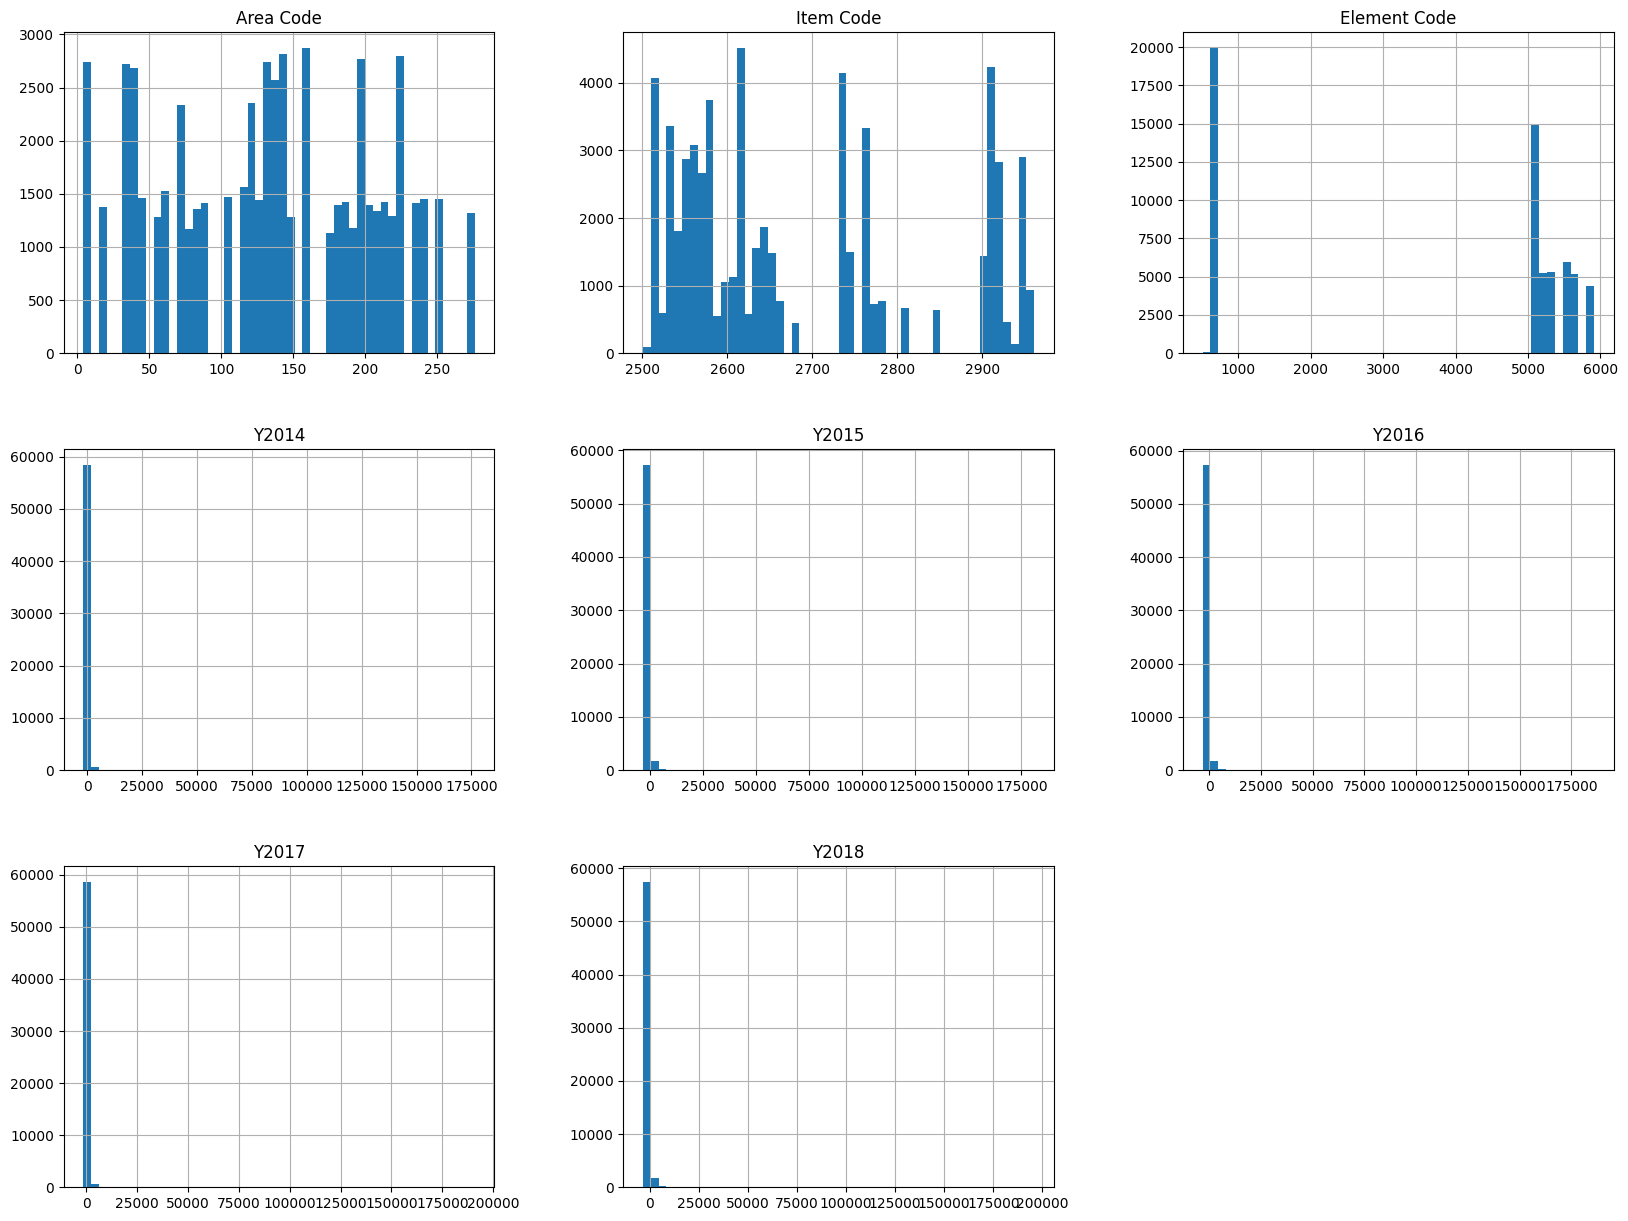

In [9]:
#Visualizing the data
import matplotlib.pyplot as plt
data.hist(bins=50, figsize = (20,15))
plt.show


In [42]:

# Group by elements and calculating the sum of variation for each year
grouped = data.groupby('Element')[['Y2014', 'Y2015', 'Y2016', 'Y2017']].sum()

# THe year with the highest sum of 'Stock Variation'
max_year = grouped.sum(axis=0).idxmax()

#To display the result
print("Year with the highest sum of Stock Variation:", max_year)

Year with the highest sum of Stock Variation: Y2017


In [15]:
# Grouping by 'Element' and calculating the sum of Processing
grouped = data.groupby('Element')[['Y2017']].sum()

# Sum of processng for 2017
sum_processing_2017 = grouped.loc['Processing', 'Y2017']

#Displaying the results
print("Total sum of Processing in 2017:", sum_processing_2017)

Total sum of Processing in 2017: 292836.0


In [40]:
#Calculating the amount of protein in 2015, at Madagascar
madagascar_protein_2015 = data.loc[(data['Area'] == 'Madagascar') & (data['Element'] == 'Protein supply quantity (g/capita/day)') & (data['Unit'] == 'g/capita/day'), 'Y2015']
total_protein_2015 = madagascar_protein_2015.sum()

#Displaying the results
print("Total Protein supply quantity in Madagascar in 2015:", total_protein_2015)


Total Protein supply quantity in Madagascar in 2015: 173.04999999999998


In [22]:
#Wine produced in 2015
wine_2015_sum = data.loc[data['Item'] == 'Wine', 'Y2015'].sum()
#Wine produced in 2018
wine_2018_sum = data.loc[data['Item'] == 'Wine', 'Y2018'].sum()

#Displaing the results
print("Total sum of Wine produced in 2015:", wine_2015_sum)
print("Total sum of Wine produced in 2018:", wine_2018_sum)


Total sum of Wine produced in 2015: 4251.8099999999995
Total sum of Wine produced in 2018: 4039.3199999999997


In [26]:
#Area with the highest sum in 2017
grouped = data[['Y2017', 'Area']].groupby('Area').sum()

#The area with the highest sum in 2017
area_highest_sum = grouped['Y2017'].idxmax()

#Displaying the result
print("Area with the highest sum in 2017:", area_highest_sum)


Area with the highest sum in 2017: Nigeria


In [28]:
#To check the number of rows and columns
data.shape

(60943, 12)

In [31]:
#Total of unique countries
total_unique_countries = data['Area'].nunique()
print("Total number of unique countries:", total_unique_countries)


Total number of unique countries: 49


In [32]:
#Area with the 7th lowest sum in 2017
grouped = data[['Y2017', 'Area']].groupby('Area').sum()
area_seventh_lowest_sum = grouped.nsmallest(7, 'Y2017').index[-1]

print("Area with the 7th lowest sum in 2017:", area_seventh_lowest_sum)


Area with the 7th lowest sum in 2017: Guinea-Bissau


In [33]:
#The year that had the least correration

#To calculate the correration for all the years
correlations = data[['Element Code', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018']].corr()
correlations = correlations['Element Code'].drop('Element Code')
year_least_correlation = correlations.idxmin()
#To dispay the result
print("Year with the least correlation with 'Element Code':", year_least_correlation)


Year with the least correlation with 'Element Code': Y2016


# New Section